In [8]:
from glob import glob
import json
import pandas as pd

In [20]:
ls = []
for filepath in glob(f"projects/test2/entity_data/Q5/**.json"):
    with open(filepath, 'r', encoding='utf-8') as f:
        doc = json.load(f)
    for prop in doc['properties']:
        for sent in prop['sents']:
            if sent['prop'] != 'Other':
                ls.append(sent)
df = pd.DataFrame.from_dict(ls)
df

,prop,sent,source,source_type,target,target_type
0,P19,"Born in Constanța, she made her worldwide brea...",NO-MATCH,Q5,Constanța,Q79808
1,P19,Alexandra Ioana Stan[10] was born on 10 June 1...,NO-MATCH,Q5,Constanța,Q79808
2,P19,[2][16] Romanian producers and songwriters Mar...,NO-MATCH,Q5,Constanța,Q79808
3,P19,When interviewed at the European Border Breake...,NO-MATCH,Q5,Constanța,Q79808
4,P19,"[95] Throughout the years, Stan has lived in v...",NO-MATCH,Q5,Constanța,Q79808
...,...,...,...,...,...,...
17297,P69,"[41][42] He attended several schools, includin...",NO-MATCH,Q5,Townsville State High School,Q7830286
17298,P19,Kiprotich is the youngest of seven children of...,NO-MATCH,Q5,Kapchorwa District,Q1229921
17299,P106,"Stephen Kiprotich (""KIP-roh-tich"", born 27 Feb...",Stephen Kiprotich,Q5,long-distance runner,Q4439155
17300,P106,"Stephen Kiprotich (""KIP-roh-tich"", born 27 Feb...",Stephen Kiprotich,Q5,long distance runner,Q4439155


In [21]:
df['prop'].value_counts()

prop
P106    11427
P19      2749
P26      1025
P69       938
P119      423
P569      266
P570      249
P509      225
Name: count, dtype: int64

In [23]:
from sentence_transformers import SentenceTransformer

# 1. Load a pretrained Sentence Transformer model
model = SentenceTransformer("all-MiniLM-L6-v2")

/Users/ngutehrl/miniconda3/envs/elijere/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [37]:
df['sent'].sample(225)

10547    [81] Millar and Ultimate Spider-Man writer Bri...
15350    Waldheim was born in Sankt Andrä-Wördern, near...
6034     Eugenio Maria Giuseppe Giovanni Pacelli was bo...
14499    Martijn Icks, in Images of Elagabalus (2008; r...
14159    David Storl (born 27 July 1990) is a German tr...
                               ...                        
7358     [216][217] Zidane emphasised the importance of...
13395    He became President of the Centre of Political...
5483     Born in Oslo to Finn Aamodt (former head coach...
12706    [476] After the fall of Napoleon, it continued...
3765     Antonio Griffo Focas Flavio Angelo Ducas Comne...
Name: sent, Length: 225, dtype: object

In [49]:
out = df[df['prop'] != 'Other'].sample(frac=1).groupby('prop').head(225)
out

,prop,sent,source,source_type,target,target_type
13143,P19,He was a co-founder of the Liberal Democratic ...,NO-MATCH,Q5,Leipzig,Q2079
15921,P106,He recalls its origin: “My original image was ...,NO-MATCH,Q5,actor,Q10798782
2162,P19,[110] One reason for Lucius' reticence may hav...,NO-MATCH,Q5,Roma,Q220
7114,P106,Among those who championed him were the writer...,NO-MATCH,Q5,writer,Q36180
2309,P106,[164] Sigmund Freud ranked Dostoevsky second o...,NO-MATCH,Q5,writer,Q36180
...,...,...,...,...,...,...
883,P509,Jesus's crucifixion is described in all four c...,Jesus,Q5,crucifixion,Q3235597
11033,P509,Subhas Chandra Bose died on 18 August 1945 fro...,Subhas Chandra Bose,Q5,burns,Q170518
2177,P509,He may have died due to the widespread epidemi...,NO-MATCH,Q5,Antonine Plague,Q599141
12102,P509,"He suffered a heart attack in May 1973, but re...",NO-MATCH,Q5,heart attack,Q12152


In [52]:
embeddings = model.encode([str(x) for x in out['sent']])


In [53]:
from matplotlib import cm
from matplotlib.colors import rgb2hex
from sklearn.decomposition import PCA 

# on veut visualiser a quel cluster chaque point appartient
# on doit donc associer chaque cluster (0, 1, 2, ...)
# a une couleur. On créé donc le mapping colormap pour lequel
# un clé est un cluster et une valeur une couleur au format
# hexadecimal
tab = cm.tab20
colormap = {i : rgb2hex(color) for i, color in zip(df['prop'].unique(), tab.colors)}
colormap


{'P19': '#1f77b4',
 'P106': '#aec7e8',
 'P569': '#ff7f0e',
 'P69': '#ffbb78',
 'P119': '#2ca02c',
 'P26': '#98df8a',
 'P509': '#d62728',
 'P570': '#ff9896'}

<Axes: xlabel='x', ylabel='y'>

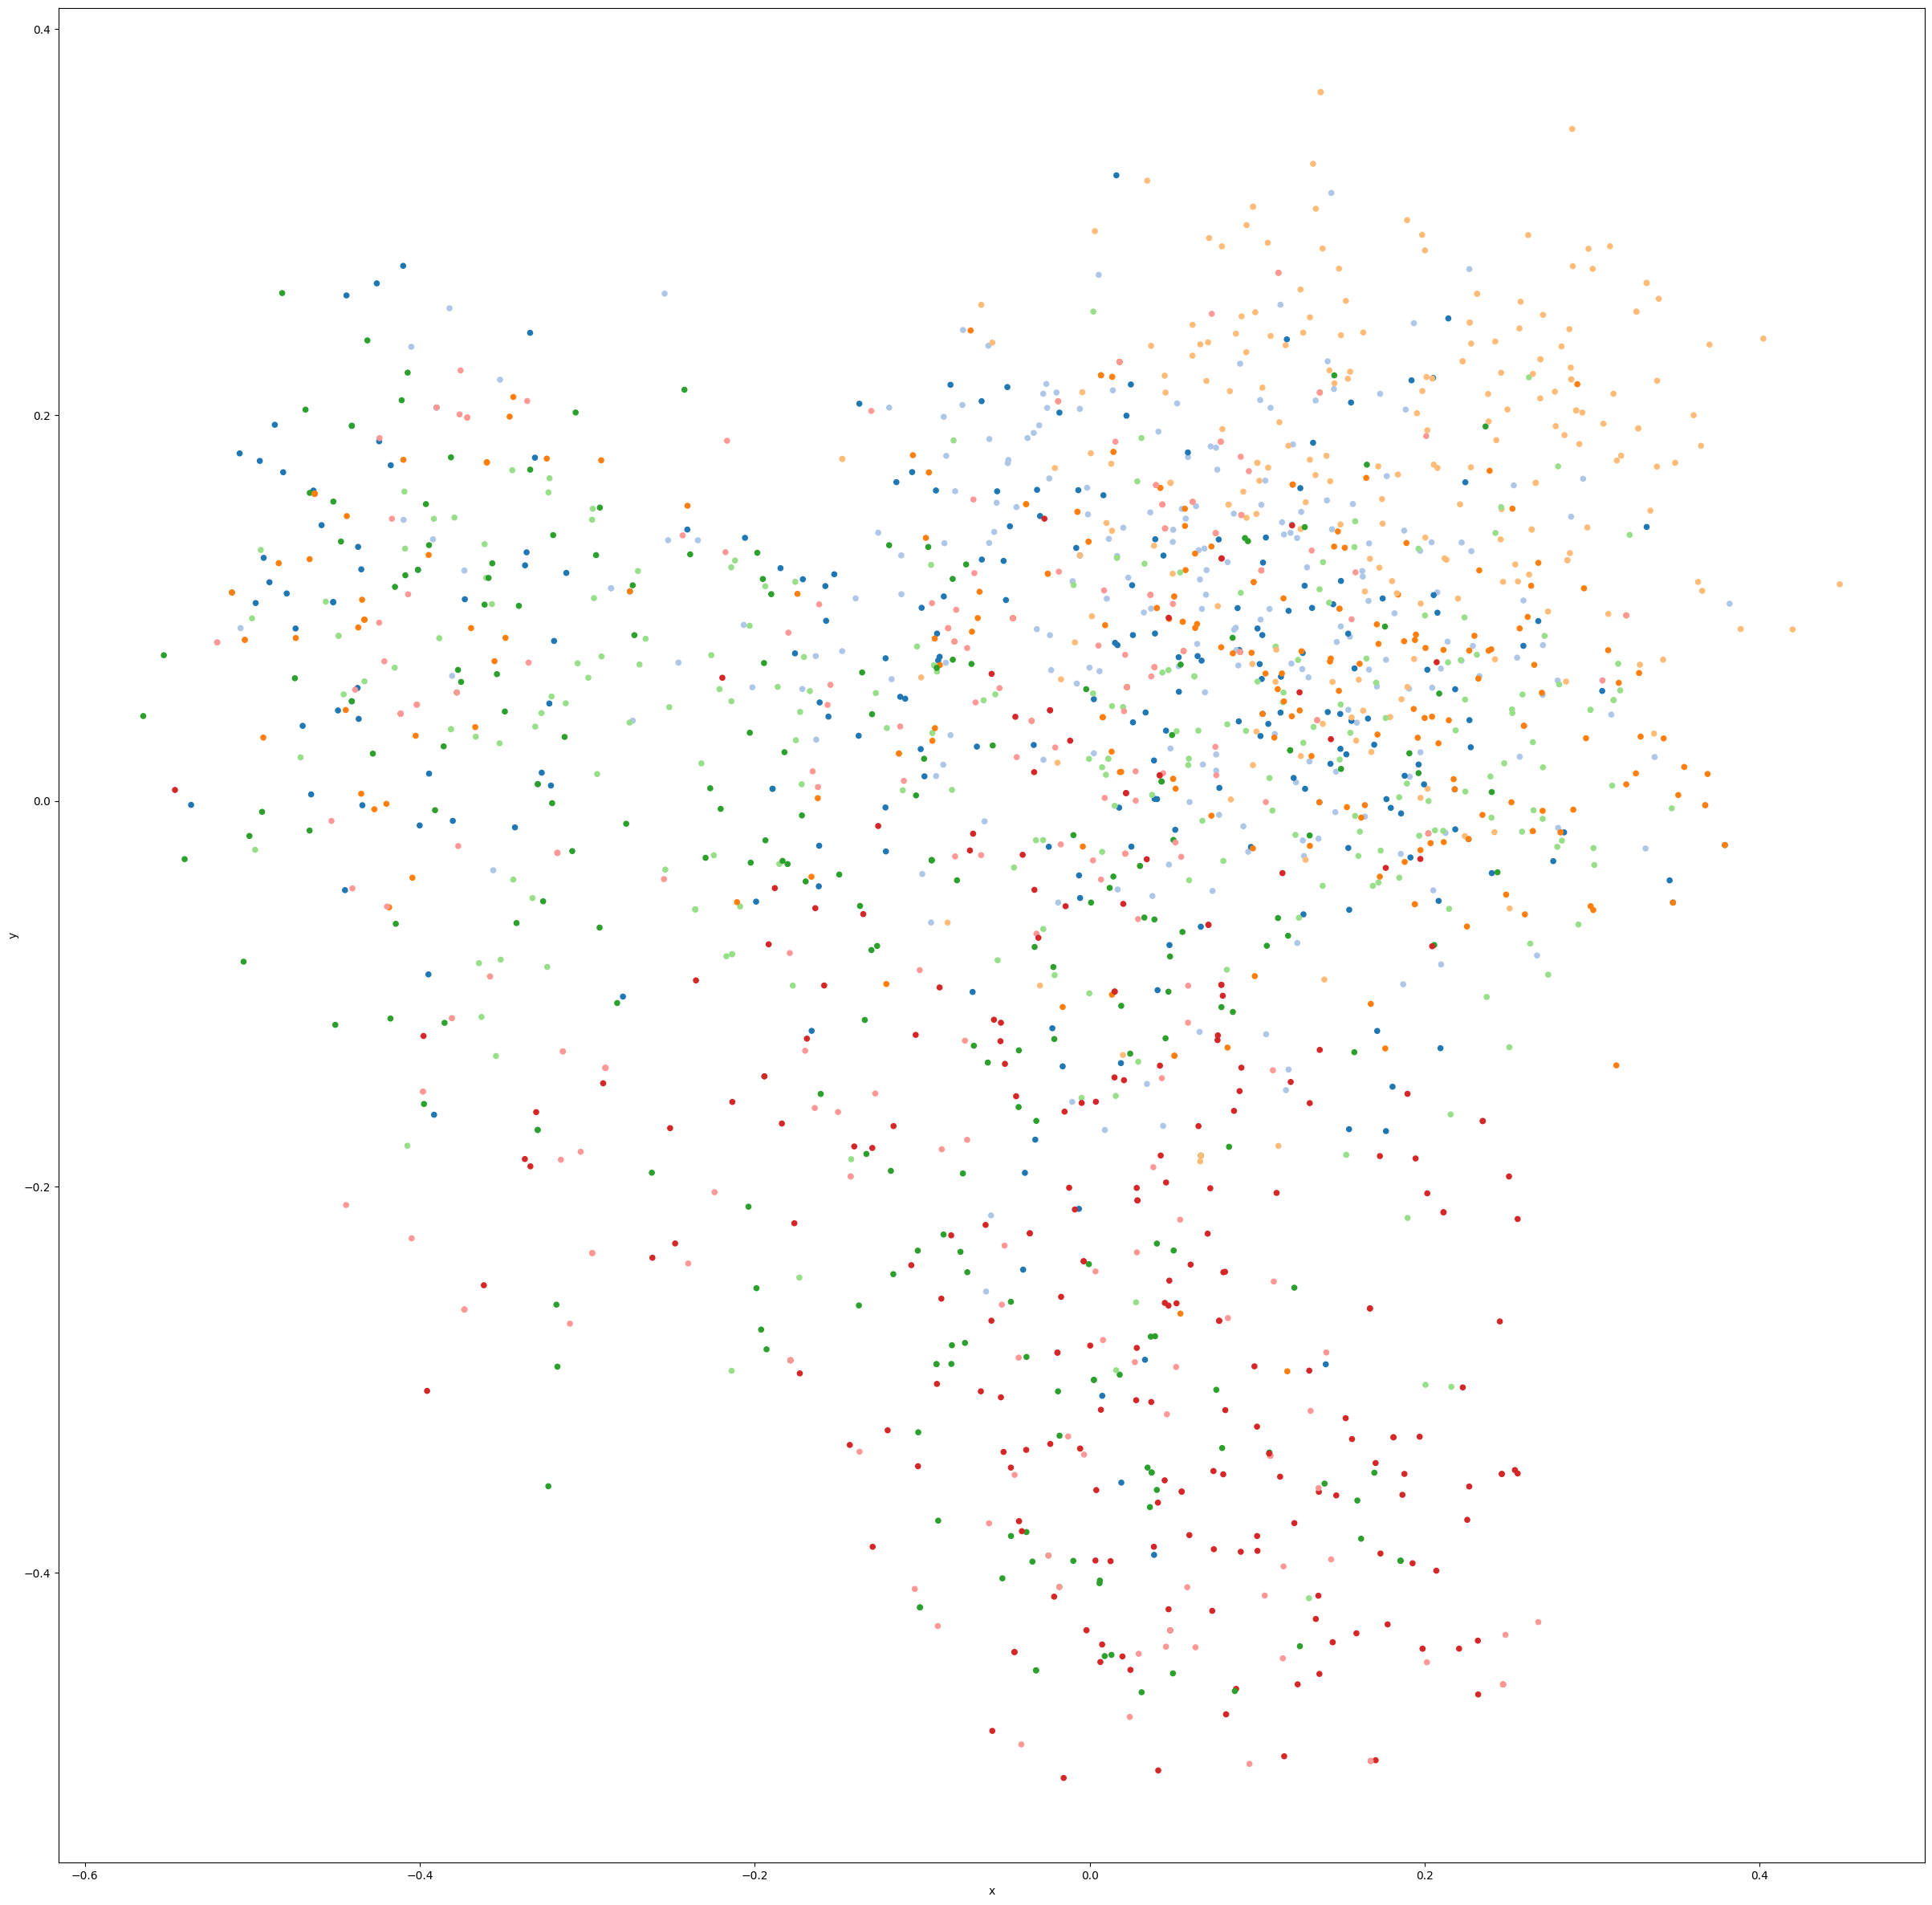

In [55]:

pca = PCA(n_components=2)
embed_2d = pca.fit_transform(embeddings)

# visualisation avec pandas
df_X2d = pd.DataFrame(embed_2d, columns=['x', 'y'])
labels = out['prop'] # on utilise le cluster de chaque document comme index
df_X2d.index = labels

df_X2d['colors'] = [colormap[x] for x in df_X2d.index]
df_X2d.plot.scatter(x='x', y='y', c='colors', figsize=(30, 30))

